In [1]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
BASE_URL = "http://127.0.0.1:4011"

In [3]:
with open('plateaus_fully_covering.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [4]:
print(response.json())

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[10.75678086443506, 59.91291413160555], [10.757212163013266, 59.913509268463564], [10.757867266534337, 59.91339283457274], [10.757486364709461, 59.91285434826322], [10.75678086443506, 59.91291413160555]]]}, 'properties': {'elevation': 3.63}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[10.756996990155885, 59.91321236033006], [10.756312148602724, 59.91334421009501], [10.756398999995643, 59.91346700000333], [10.756516000002959, 59.913633000004204], [10.757212163013254, 59.91350926846357], [10.756996990155885, 59.91321236033006]]]}, 'properties': {'elevation': 4.63}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[10.75628300000438, 59.91330300000502], [10.756312148602724, 59.91334421009501], [10.756996990155885, 59.91321236033006], [10.75678086443506, 59.91291413160555], [10.756245682709302, 59.912959479672516], [10.7560528153073

In [40]:
response_json = response.json()

In [42]:
response.content

b'{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[1.0,0.0],[1.0,1.0],[2.0,1.0],[2.0,0.0],[1.0,0.0]]]},"properties":{"elevation":3.63}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.0,0.0],[2.0,1.0],[3.0,1.0],[3.0,0.0],[2.0,0.0]]]},"properties":{"elevation":5.0}}]}'

In [4]:
gcs="EPSG:4326"
pcs="EPSG:3857"
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"], crs=gcs).to_crs(pcs)
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"], crs=gcs).to_crs(pcs)
result_gdf = gpd.GeoDataFrame.from_features(response.json(), crs=gcs).to_crs(pcs)

Text(254.98623053968737, 0.5, 'Latitude')

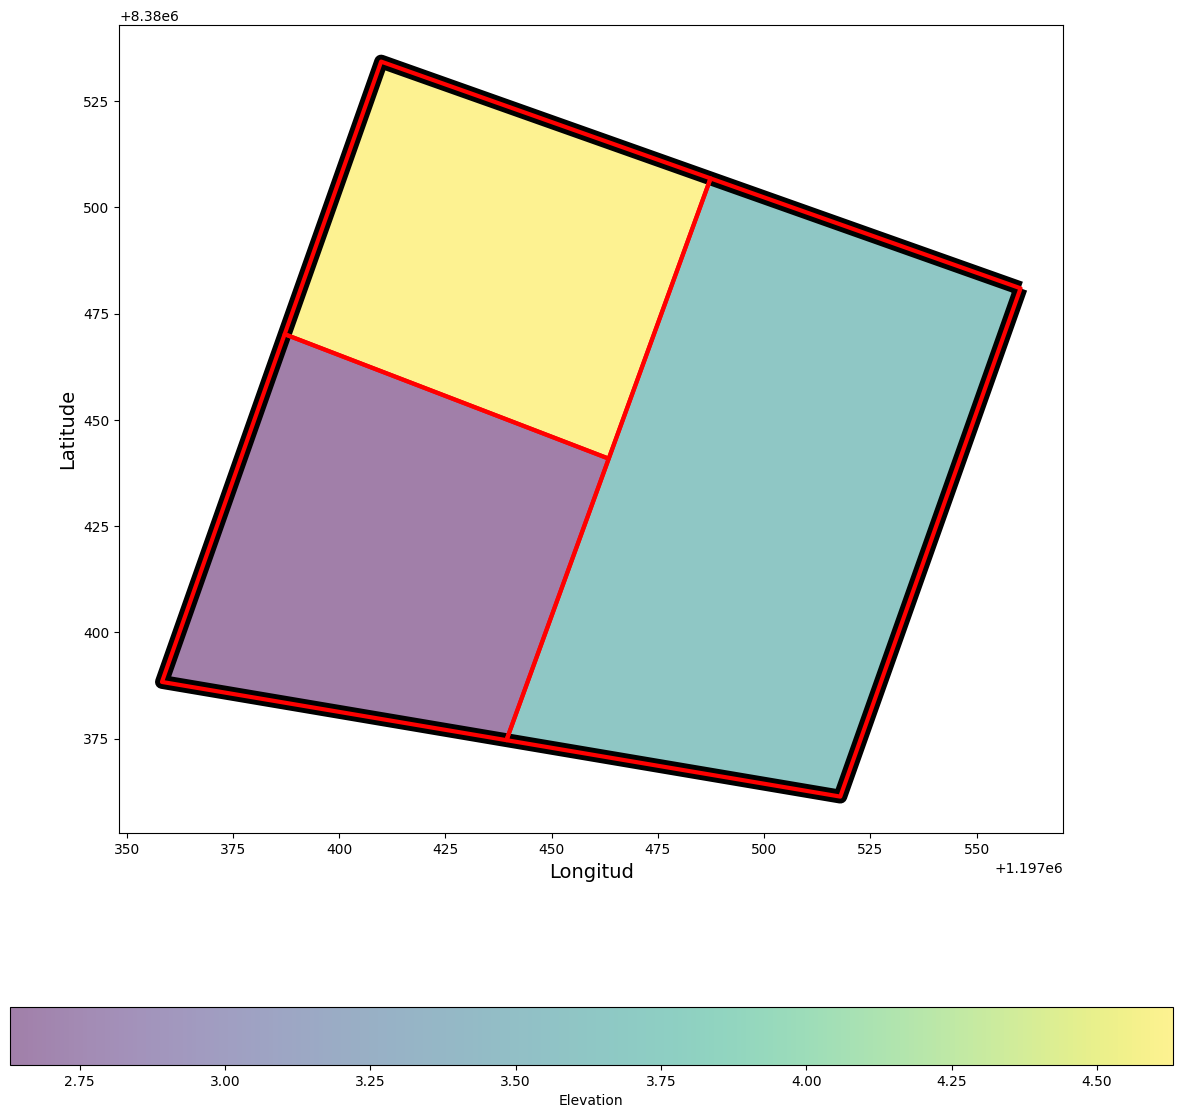

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [43]:
with open('../tests/input_files/plateaus_covering_building_limit.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [45]:
response.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.0],
      [0.0, 10.0],
      [5.0, 10.0],
      [5.0, 0.0],
      [0.0, 0.0]]]},
   'properties': {'elevation': 3.63}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[5.0, 0.0],
      [5.0, 10.0],
      [10.0, 10.0],
      [10.0, 0.0],
      [5.0, 0.0]]]},
   'properties': {'elevation': 4.63}}]}

In [14]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json())

Text(331.5972222222223, 0.5, 'Latitude')

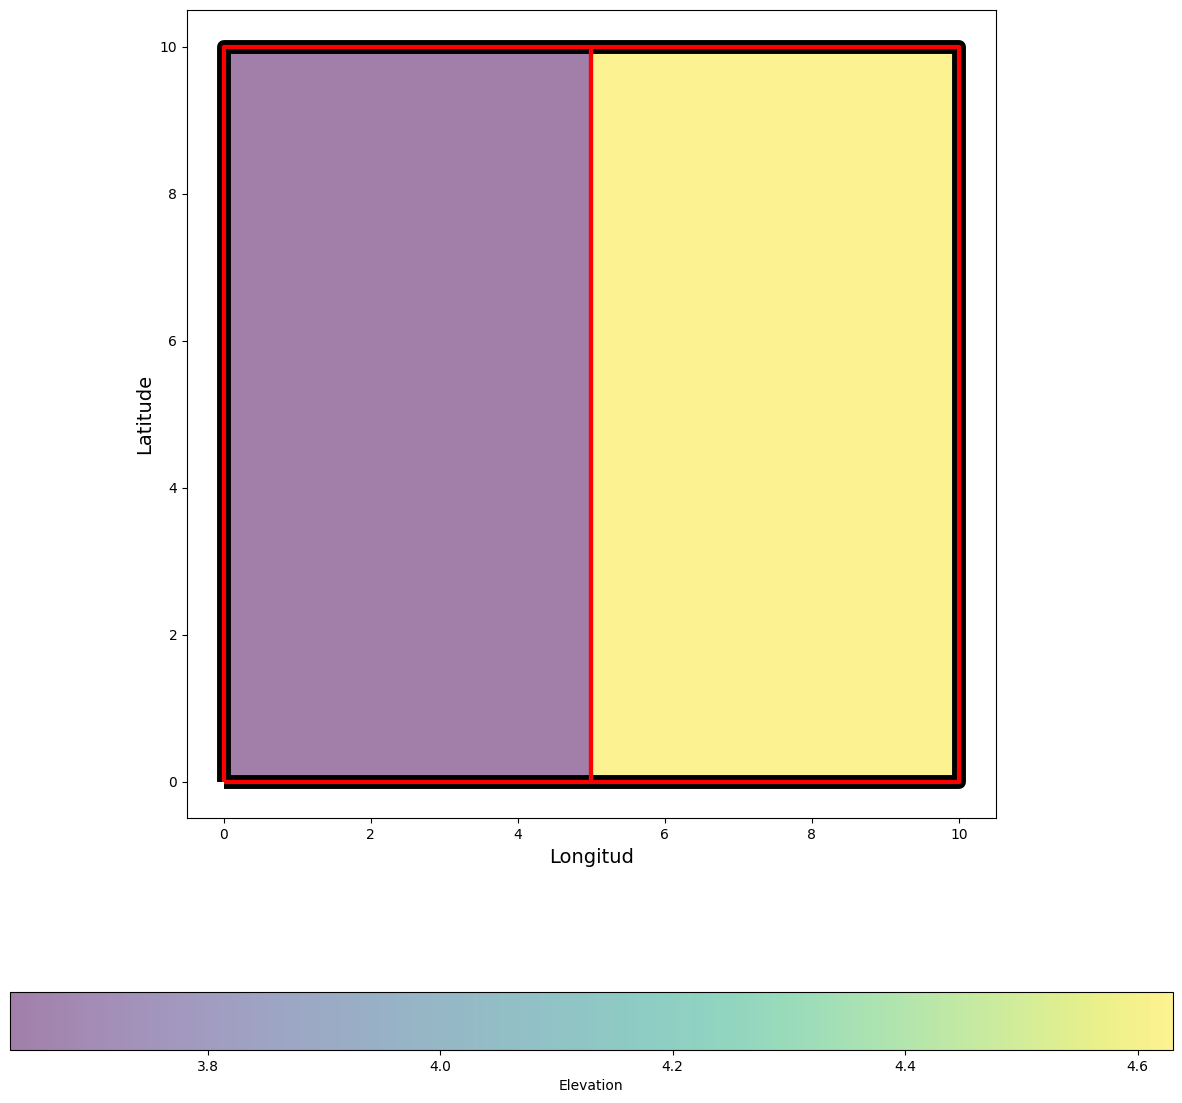

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [3]:
with open('../tests/input_files/plateaus_covering_multiple_building_limits.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [27]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json())

Text(331.5972222222223, 0.5, 'Latitude')

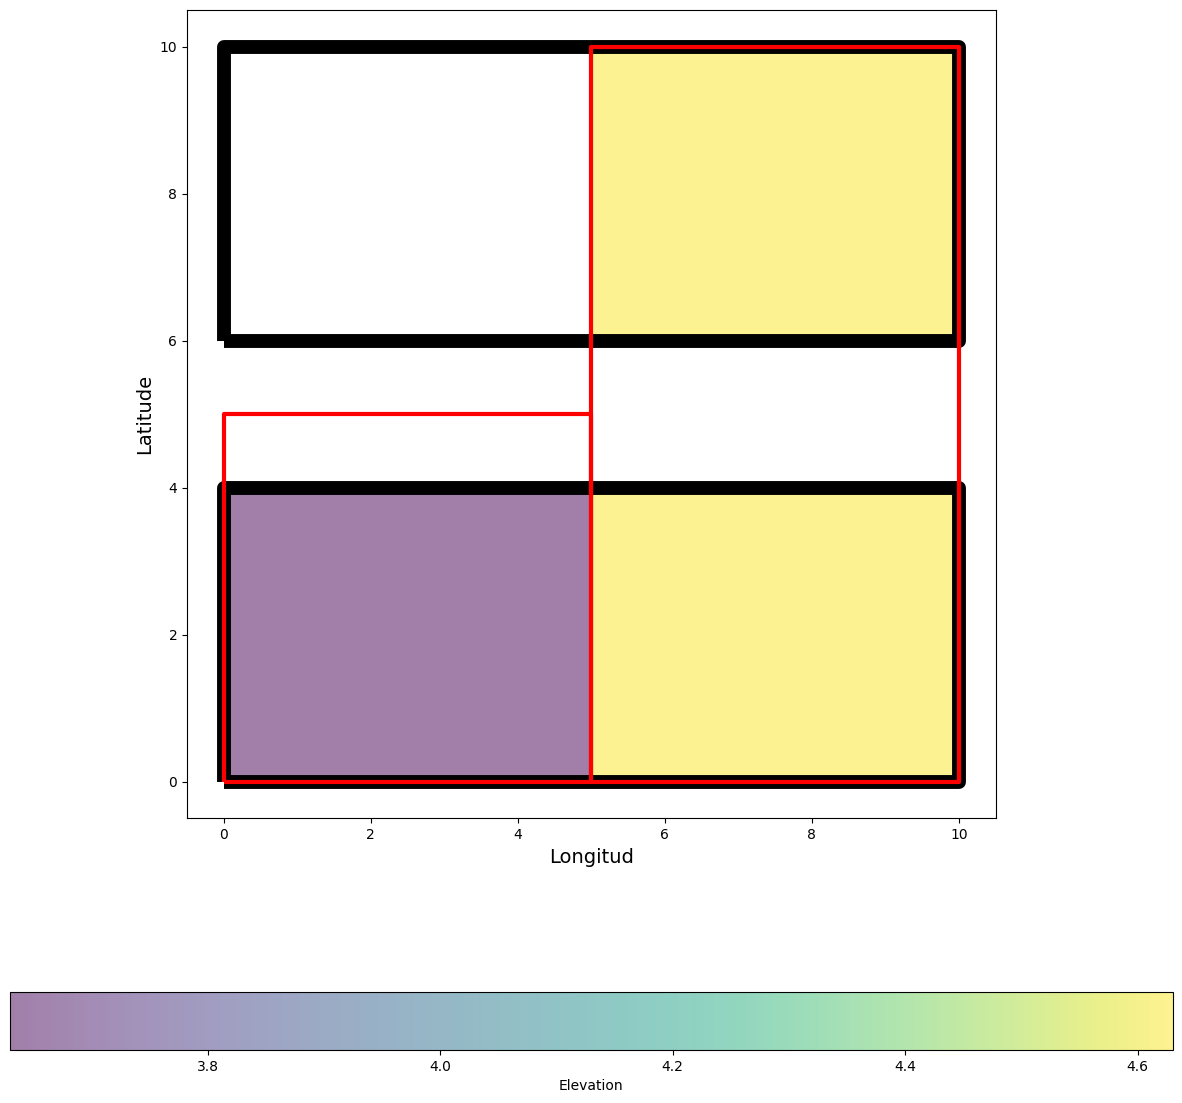

In [28]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [5]:
response.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.0],
      [0.0, 4.0],
      [5.0, 4.0],
      [5.0, 0.0],
      [0.0, 0.0]]]},
   'properties': {'elevation': 3.63}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[5.0, 0.0],
      [5.0, 4.0],
      [10.0, 4.0],
      [10.0, 0.0],
      [5.0, 0.0]]]},
   'properties': {'elevation': 4.63}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[10.0, 6.0],
      [5.0, 6.0],
      [5.0, 10.0],
      [10.0, 10.0],
      [10.0, 6.0]]]},
   'properties': {'elevation': 4.63}}]}

In [29]:
with open('../tests/input_files/plateaus_covering_multiple_building_limits2.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [30]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json())

Text(192.47222222222223, 0.5, 'Latitude')

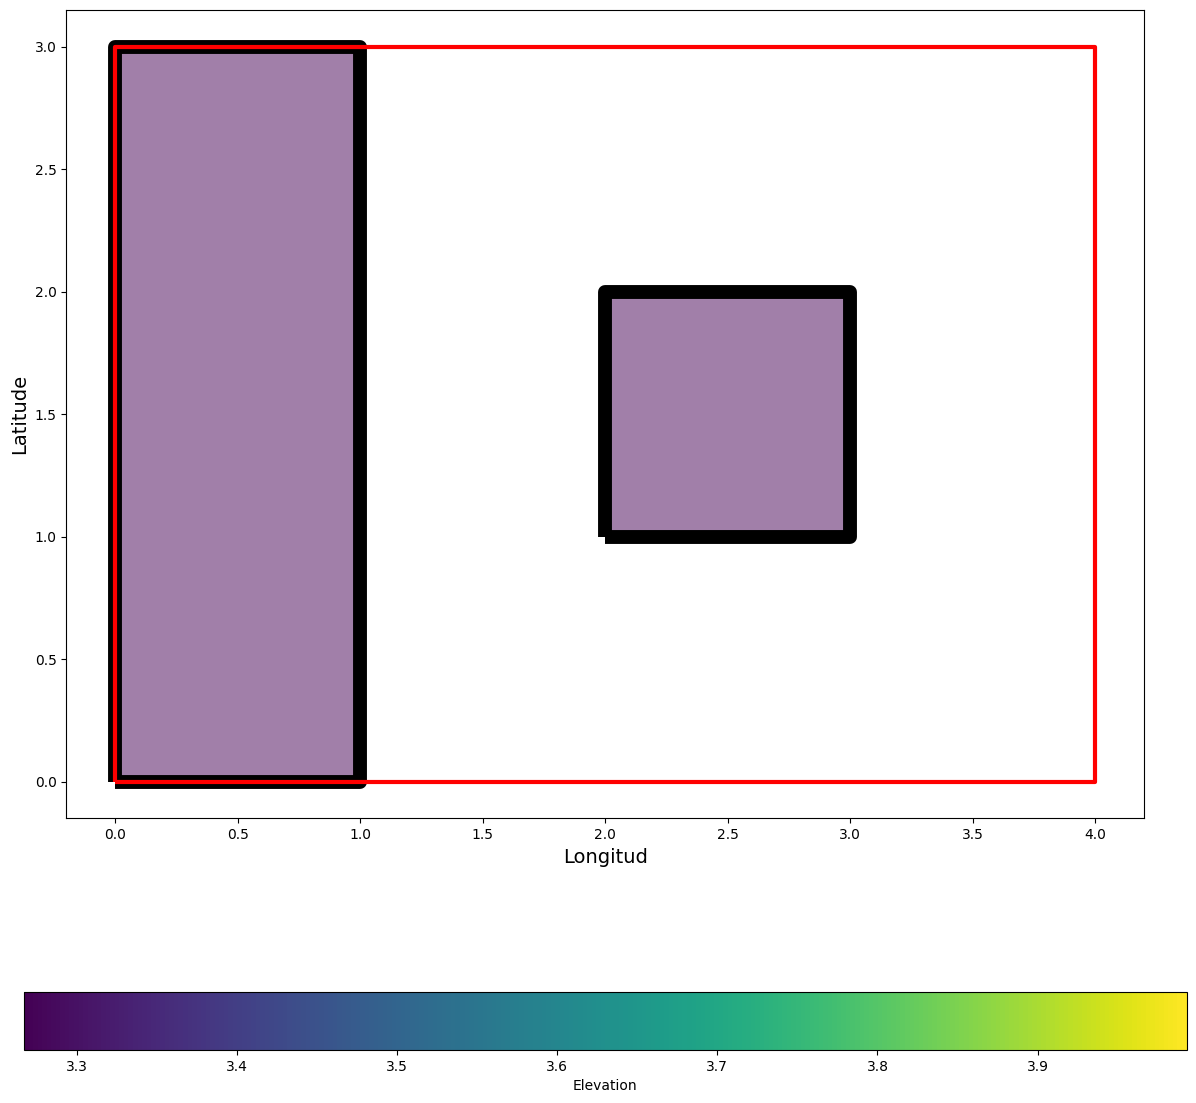

In [31]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [35]:
with open('../tests/input_files/plateaus_covering_multiple_building_limits3.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [36]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json())

Text(150.22222222222223, 0.5, 'Latitude')

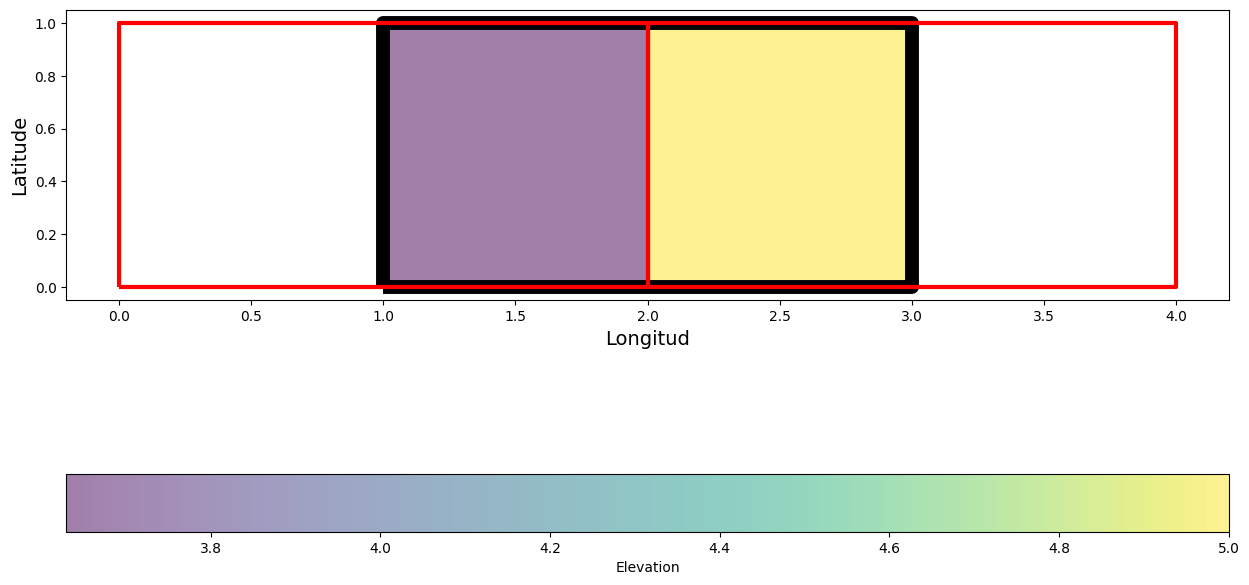

In [37]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [12]:
with open('../tests/input_files/plateaus_covering_building_limit_with_holes_error.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [13]:
response.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.0],
      [0.0, 10.0],
      [5.0, 10.0],
      [5.0, 0.0],
      [0.0, 0.0]],
     [[3.0, 2.0], [3.0, 8.0], [2.0, 8.0], [2.0, 2.0], [3.0, 2.0]]]},
   'properties': {'elevation': 3.63}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[5.0, 0.0],
      [5.0, 10.0],
      [10.0, 10.0],
      [10.0, 0.0],
      [5.0, 0.0]]]},
   'properties': {'elevation': 4.63}}]}

In [14]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json())

Text(331.5972222222223, 0.5, 'Latitude')

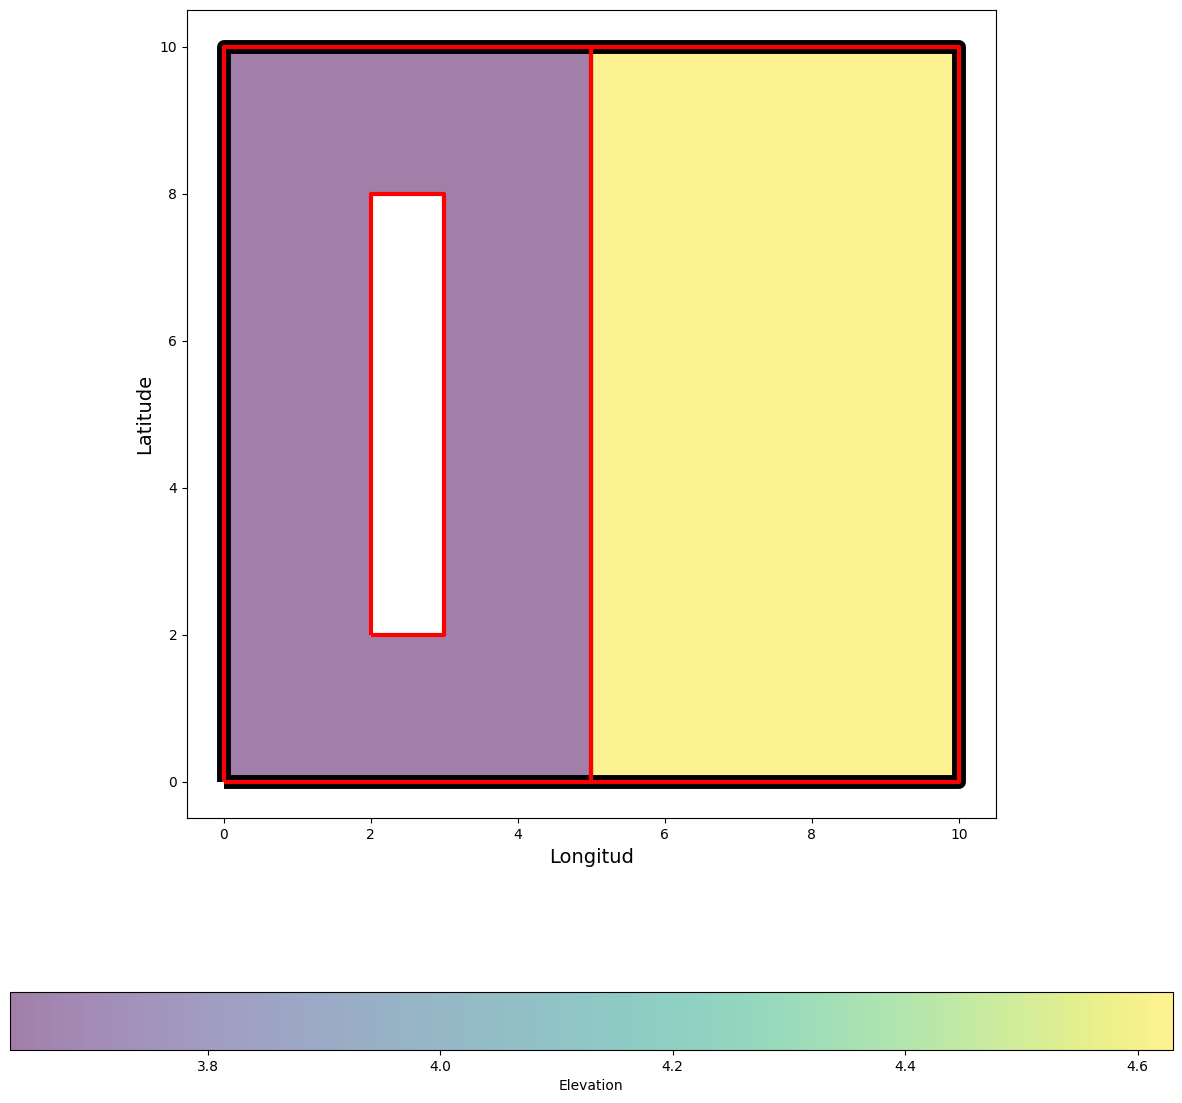

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [9]:
with open('../tests/input_files/plateaus_covering_building_limit.json') as user_file:
  input_json = json.load(user_file)
# params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json)

In [23]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json())

Text(331.5972222222223, 0.5, 'Latitude')

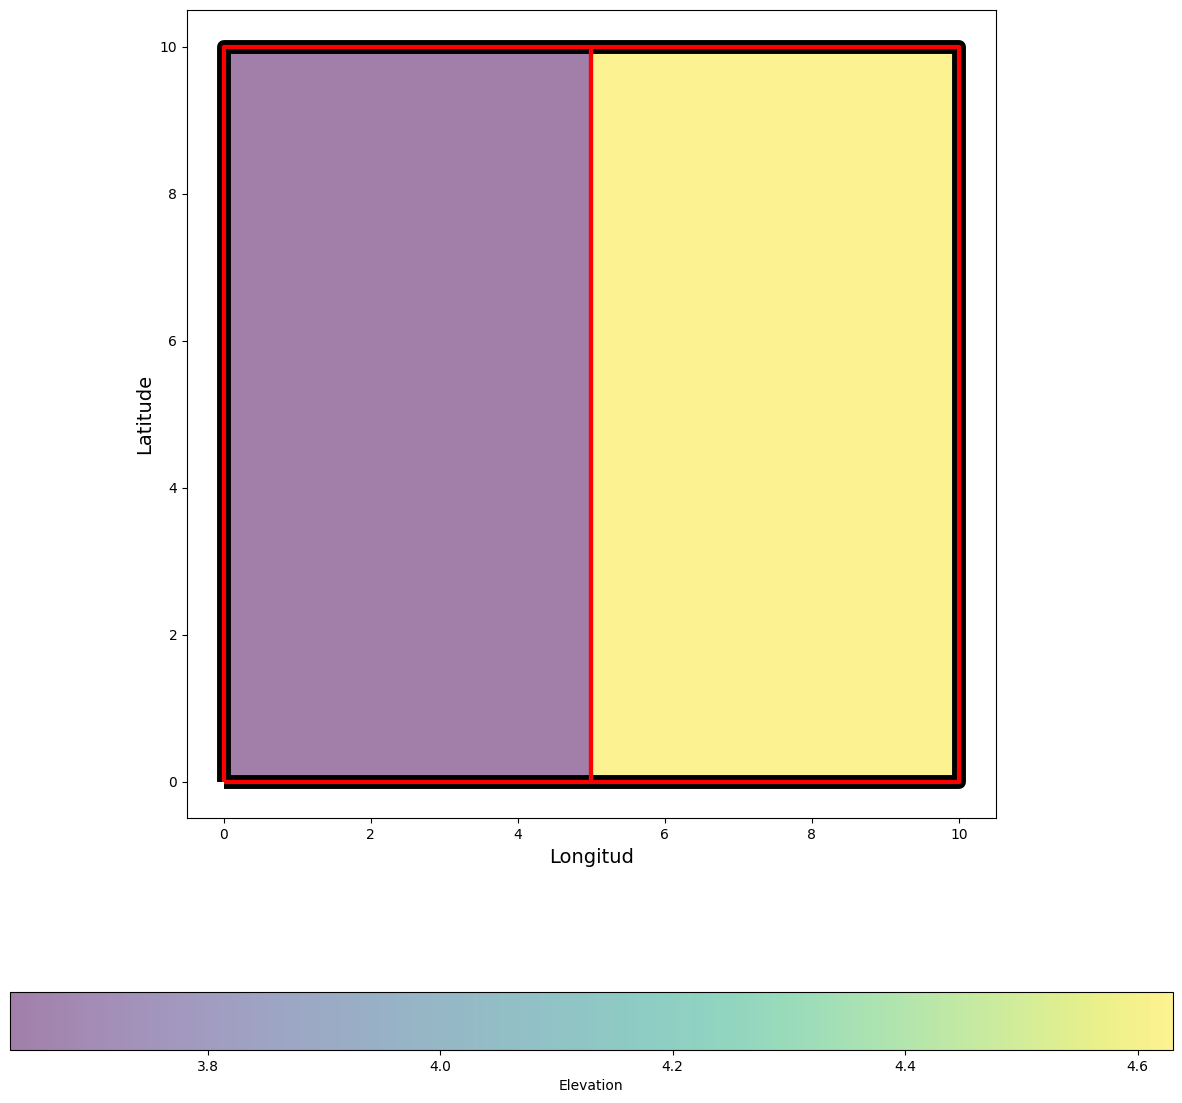

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
# fig.suptitle('Split building limits', fontsize=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
# ax.tick_params(labelsize=20)
# plt.plot()

In [10]:
response.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.0],
      [0.0, 10.0],
      [5.0, 10.0],
      [5.0, 0.0],
      [0.0, 0.0]]]},
   'properties': {'elevation': 3.63}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[5.0, 0.0],
      [5.0, 10.0],
      [10.0, 10.0],
      [10.0, 0.0],
      [5.0, 0.0]]]},
   'properties': {'elevation': 4.63}}]}

In [ ]:
# new section to test for errors: overlapping polygons and holes (show the input)

In [1]:
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
polygon1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
polygon2 = Polygon([(2, 0), (4, 0), (4, 4), (2, 4)])
polygon3 = Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])
data1 = {'Name': ['Polygon 1', 'Polygon 2'], 'Geometry': [polygon1, polygon2]}
gdf1 = gpd.GeoDataFrame(data1, geometry='Geometry')
data2 = {'Name': ['Polygon 3'], 'Geometry': [polygon3]}
gdf2 = gpd.GeoDataFrame(data2, geometry='Geometry')

<Axes: >

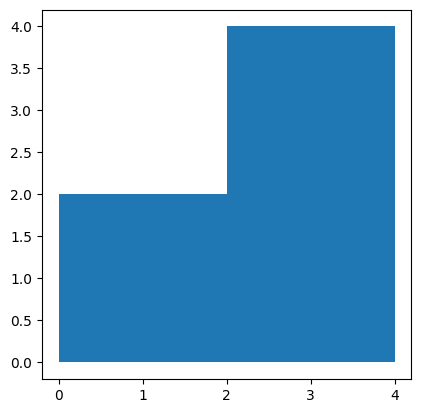

In [8]:
df.plot()

In [23]:
gdf2

,Name,Geometry
0,Polygon 3,"POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2...."


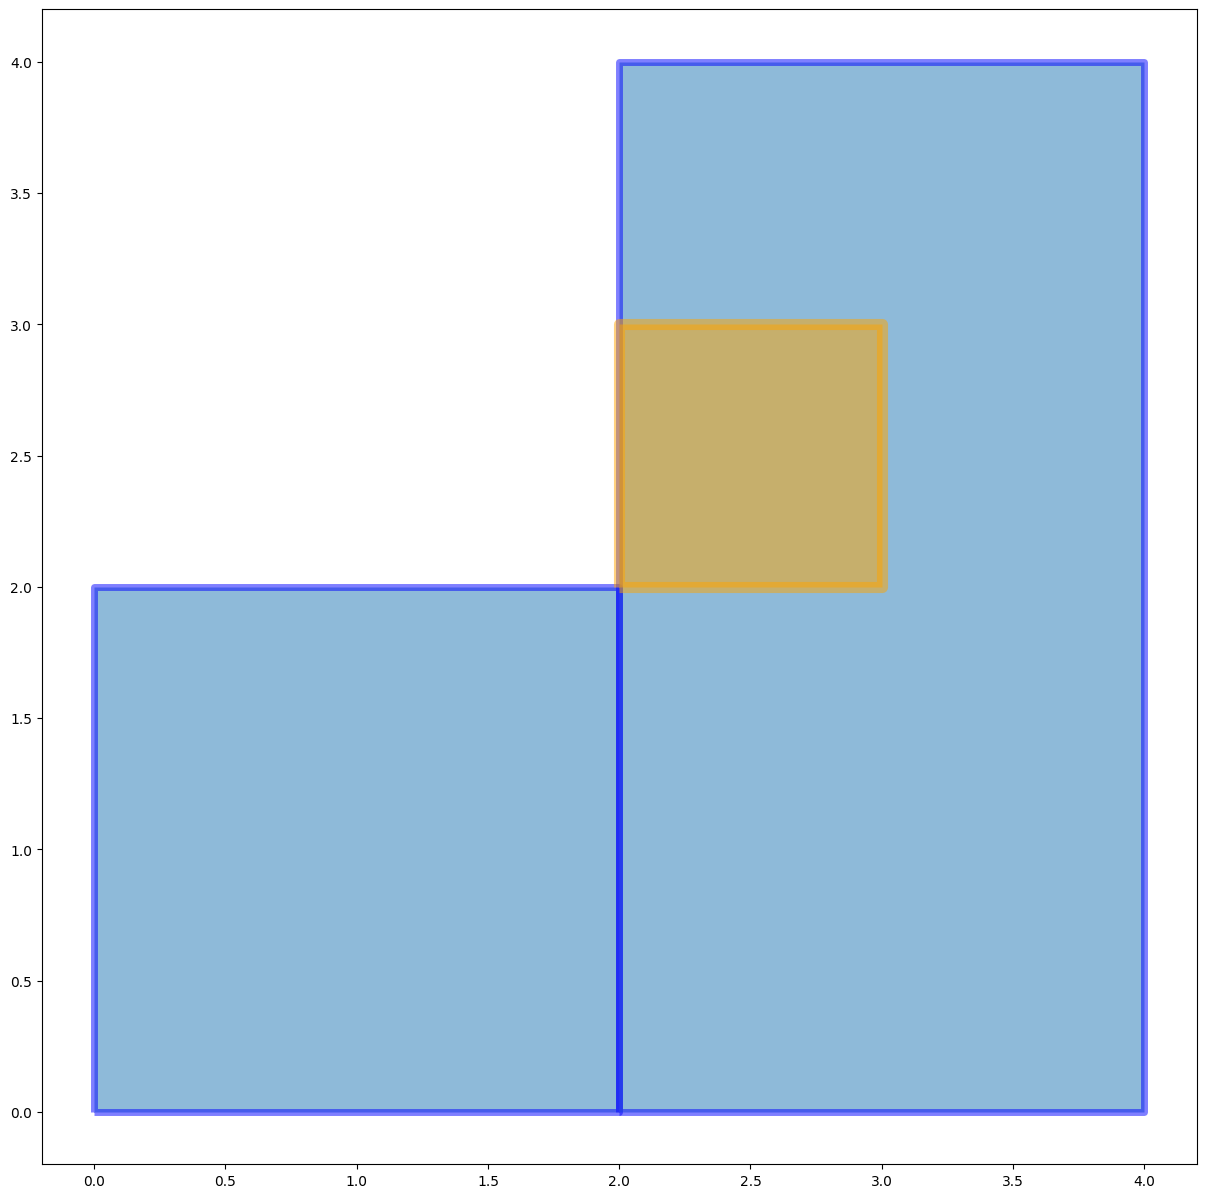

In [2]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = gdf1.plot(ax=ax, alpha=0.5, legend=True, linewidth=5, edgecolor="blue")
_ = gdf2.plot(ax=ax, alpha=0.5, edgecolor="orange", linewidth=8, facecolor="orange")


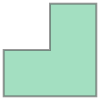

In [27]:
gdf1.unary_union

In [4]:
gdf1.unary_union.contains(gdf2.unary_union.buffer(1e-6))

False

In [9]:
difference = gdf1.overlay(gdf2, how="difference")

In [12]:
gdf1.unary_union.contains(difference.unary_union.buffer(1e-6)

True